<h1>Análise Exploratória e IA</h1>

<p>Este trabalho faz parte das UCs de Análise de Dados e Big Data e Inteligência Artificial dos Cursos de Tecnologia do Ecossistema Ânima Educação</p>

<p>Abaixo traremos o passo a passo do que foi feito, não será feito o upload deste dataset no Github, para trazer uma experiência mais próxima ao Big Data Trouxemos um dataset que não pode ser aberto no Excel, conforme veremos na sequencia este dataset tem mais de seis milhões de linhas, ou seja, traremos o obstáculo que um Analista de Dados realmente tem ao Analisar dadaos em grande volume, hoje existem técnicas mais aprofundadas para fazer Análise de Dados neste volume no Excel ou no Power Bi que são suítes mais comuns para usuários de negócio por conta do self-service BI e outros, porém, iremos trazer uma experiência mais imersiva possível de uma análise de um grande conjunto de dados</p> 

<p>Então por que não subir o dataset no GitHub? Por um motivo que só foi descoberto após tentar subir o mesmo, o Github gratuíto só permite que seja feito o upload de arquivos com até 100mb de tamanho e para trazer um dataset com uma grande quantidade de registros acabamos encontrando este dataset com mais de 450mb, mas como resolver este problema?</p>

<p>Quando trabalhamos principalmente com node em programação web, utilizamos o yarn ou o npm que são repositórios de pacotes para a programação web, assim como o pip é para o python, porém, em um projeto web, você instala esses pacotes para cada projeto que está desenvolvendo e esses pacotes ficam na pasta Node_Modules muitas vezes ocupam muito espaço físico nos HD's e para resolver este problema, o git hub inventou o arquivo .gitignore, ou seja, tudo que estiver listado no .gitignore não é subido no github e quando você clona o repositório o simples comando npm install já baixa todos os pacotes que estão package.json como as dependências do projeto, estamos utilizando esta mesma técnica</p>

<p>Se tiver interesse em reproduzir a execução do notebook, basta baixar o dataset original , deixamos o link abaixo para o local de onde baixamos que é o Kaggle e caso, por algum motivo, o Kaggle remova o dataset, deixamos uma cópia disponível para Download no google drive.</p>


<p><a href='https://www.kaggle.com/datasets/chitwanmanchanda/fraudulent-transactions-data'><h3><b>Link Kaggle</b></h3> </a></p></style> 

<p><a href='https://drive.google.com/file/d/1Uwtd9_sW51Au0M1RtDBCGHL7Q9Ar14Gu/view?usp=sharing'><h3><b>Link Google Drive</b></h3> </a></p></style> 

<h4>Iniciaremos Importando os Pacotes</h4>

In [1]:
#Estes são os principais Pacotes que iremos importar
import pandas as pd  #Pandas para manipulação dos dataframes
import matplotlib.pyplot as plt #matplot lib para plotar a maioria dos gráficos que serão apresentados
import matplotlib.ticker as ticker #Ticker para personalizar melhor os eixos dos gráficos
import warnings #para remover alguns warnings
import seaborn as sns #para plotar o heatmap 
import numpy as np 

from sklearn.model_selection import train_test_split # para splitar os dados
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier  # primeiro algortimo testado arvore de decisão 
from sklearn.linear_model import LogisticRegression #regressão logística
from sklearn.neural_network import MLPClassifier #Rede Neural MLP
from sklearn.svm import SVC #Support Vector Classifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier


from sklearn.metrics import accuracy_score

import datetime 
# Evitar warnings para melhor experiência de Apresentação
warnings.filterwarnings("ignore")

<h4>As notações científicas são um formato numérico que não estamos acostumados à ver como por exemplo 1e7 , então iremos removêla<h4>

In [2]:
pd.set_option('display.float_format', '{:.2f}'.format) #este comando removerá do numpy a notação ciêntifica.

<h4>Agora iremos importar os dados</h4>

In [3]:
dataset = pd.read_csv("dataset/Fraud.csv")

<h4>Verificando se existem valores Nulos</h4>

In [4]:
dataset.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

<h4>Ok, Sem valores nulos, vamos ver o tamanho do dataset que estamos manipulando</h4>

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


<h4>Aqui fica evidente o tamanho do dataset com 6362620 e 11 colunas, faremos comentários mais profundos sobre o porque é muito difícil manipular esse tipo de dataset com técnicas de escritório comuns na área de negócios como o Excel ou outros recursos, mas por hora, podemos ver que carregamos o dataset de forma muito rápida e poderemos manipular o mesmo de forma muito rápida também com a linguagem python.</h4>

<h4>Quais serão os tipos dos dados?</h4>

In [6]:
dataset.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

<h4>Existem 3 colunas de texto o restante são colunas numéricas, vamos dar uma olhada nestes dados, as primeiras linhas, as ultimas e uma amostra geral</h4>

In [7]:
dataset.head(15)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.00,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.00,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.00,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.00,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.00,40348.79,0,0


In [8]:
dataset.tail(15)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362605,742,CASH_OUT,54652.46,C43545501,54652.46,0.00,C830041824,0.00,54652.46,1,0
6362606,742,TRANSFER,303846.74,C959102961,303846.74,0.00,C114421319,0.00,0.00,1,0
6362607,742,CASH_OUT,303846.74,C1148860488,303846.74,0.00,C846260566,343660.89,647507.63,1,0
6362608,742,TRANSFER,258355.42,C1226129332,258355.42,0.00,C1744173808,0.00,0.00,1,0
6362609,742,CASH_OUT,258355.42,C1113162093,258355.42,0.00,C797688696,25176.67,283532.09,1,0
6362610,742,TRANSFER,63416.99,C778071008,63416.99,0.00,C1812552860,0.00,0.00,1,0
6362611,742,CASH_OUT,63416.99,C994950684,63416.99,0.00,C1662241365,276433.18,339850.17,1,0
6362612,743,TRANSFER,1258818.82,C1531301470,1258818.82,0.00,C1470998563,0.00,0.00,1,0
6362613,743,CASH_OUT,1258818.82,C1436118706,1258818.82,0.00,C1240760502,503464.50,1762283.33,1,0
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.00,C1850423904,0.00,0.00,1,0


In [9]:
dataset.sample(15)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2503429,204,CASH_OUT,435577.75,C357211416,0.00,0.00,C1850508675,3419911.21,3855488.96,0,0
59898,9,PAYMENT,10350.28,C1022770963,114795.87,104445.59,M774402708,0.00,0.00,0,0
732521,37,PAYMENT,9540.12,C136057062,0.00,0.00,M2032230436,0.00,0.00,0,0
3485771,258,PAYMENT,16691.51,C1021514856,21127.45,4435.93,M750872666,0.00,0.00,0,0
6299308,681,CASH_OUT,45569.46,C1233420356,0.00,0.00,C1581528656,10889244.30,10934813.76,0,0
1197587,133,CASH_IN,268220.31,C45614766,1365495.56,1633715.87,C536334539,428612.05,160391.74,0,0
5727044,399,CASH_IN,279054.25,C1573949005,23170114.92,23449169.17,C1965987934,2436919.61,2157865.35,0,0
6195961,573,TRANSFER,79359.70,C2112612718,69483.00,0.00,C769889838,354639.64,433999.33,0,0
198463,13,PAYMENT,12857.07,C866766168,590721.84,577864.77,M1972492312,0.00,0.00,0,0
5451530,379,PAYMENT,13322.49,C1217351875,95078.90,81756.41,M1956861905,0.00,0.00,0,0


<h4>Aparentemente só temos mesmo uma variável categórica no formato de texto, já que são 3 colunas e duas delas podemos dizer que são Labels não há muito bem como classificar elas, aparentemente existe um prefixo no nome do nameOrig e no nameDest além disso o type seria a principal categórica, vamos dar uma olhada no describe do dataset</h4>

In [10]:
dataset.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00
mean,243.40,179861.90,833883.10,855113.67,1100701.67,1224996.40,0.00,0.00
std,142.33,603858.23,2888242.67,2924048.50,3399180.11,3674128.94,0.04,0.00
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,156.00,13389.57,0.00,0.00,0.00,0.00,0.00,0.00
50%,239.00,74871.94,14208.00,0.00,132705.66,214661.44,0.00,0.00
75%,335.00,208721.48,107315.18,144258.41,943036.71,1111909.25,0.00,0.00
max,743.00,92445516.64,59585040.37,49585040.37,356015889.35,356179278.92,1.00,1.00


<h4>Parece bem discrepante os valores acima do 75 percentil, vamos tentar isolar esse prefixo criando duas novas colunas no dataset.</h4>

In [11]:
# Criar a coluna "prefixNameOrig" no dataset
dataset['prefixNameOrig'] = dataset['nameOrig'].apply(lambda x: x[0])

# Criar a coluna "prefixNameDest" no dataset
dataset['prefixNameDest'] = dataset['nameDest'].apply(lambda x: x[0])

<h4>Já que temos poucas variáveis categóricas iremos criar mais uma, uma faixa de valor das transações onde:</h4>

<h5>a primeira faixa vai de 0 a 100.000</h5>
<h5>a segunda faixa vai de 100.000 a 500.000</h5>
<h5>a terceira faixa vai de 500.000 a 1.000.000</h5>
<h5>a quarta faixa vai de 1.000.000 a 10.000.000</h5>
<h5>a quinta faixa são valores maiores que 10.000.000</h5>

In [12]:
# Definir as faixas de valores e os rótulos
faixas = [
    (0, 100000, 'Faixa 1'),
    (100000, 500000, 'Faixa 2'),
    (500000 , 1000000, 'Faixa 3'),
    (1000000, 10000000, 'Faixa 4'),
    (10000000, float('inf'), 'Faixa 5')
]

# Função para atribuir a categoria com base no valor
def assign_category(amount):
    for i, faixa in enumerate(faixas):
        if faixa[0] <= amount < faixa[1]:
            return faixa[2]
    return None

# Criar a coluna "amount_category" com as faixas de valores no dataset numérico
dataset['amount_category'] = dataset['amount'].apply(assign_category)



<h4>Vamos ver como ficou</h4>

In [13]:
dataset.sample(15)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,prefixNameOrig,prefixNameDest,amount_category
2350702,189,CASH_IN,90846.32,C1444696899,8760699.79,8851546.11,C1398316663,810517.34,719671.02,0,0,C,C,Faixa 1
4345139,308,TRANSFER,701950.80,C409278596,10986.00,0.00,C203082427,2499751.49,3201702.29,0,0,C,C,Faixa 3
3855445,283,PAYMENT,10493.57,C396691123,0.00,0.00,M948261636,0.00,0.00,0,0,C,M,Faixa 1
2119350,183,CASH_OUT,274863.65,C1479280927,0.00,0.00,C2089629621,858464.63,1133328.28,0,0,C,C,Faixa 2
652460,35,CASH_OUT,141250.31,C385779760,10616.00,0.00,C850426597,160405.73,301656.04,0,0,C,C,Faixa 2
3796382,281,PAYMENT,6417.39,C1909879077,32809.28,26391.89,M1776126386,0.00,0.00,0,0,C,M,Faixa 1
2562812,206,CASH_IN,146514.23,C624998793,159475.14,305989.37,C784176608,2963025.24,2816511.01,0,0,C,C,Faixa 2
2698619,211,CASH_IN,75083.02,C324782483,160.00,75243.02,C2102476101,253037.18,280777.91,0,0,C,C,Faixa 1
809653,40,CASH_OUT,87276.18,C1214955450,0.00,0.00,C531072524,95981.45,183257.63,0,0,C,C,Faixa 1
3203715,249,CASH_IN,191058.19,C955209936,7724984.90,7916043.09,C1985253789,2463637.45,2272579.26,0,0,C,C,Faixa 2


<h4>O Describe tem comportamento diferente para variáveis de texto e variáveis numéricas, vamos mandar um describe nas variáveis numéricas e um nas variáveis de texto para ver se obtemos algum insite.<h4>

In [14]:
dataset[['type', 'nameOrig' , 'nameDest', 'prefixNameOrig' , 'prefixNameDest', 'amount_category']].describe()

,type,nameOrig,nameDest,prefixNameOrig,prefixNameDest,amount_category
count,6362620,6362620,6362620,6362620,6362620,6362620
unique,5,6353307,2722362,1,2,5
top,CASH_OUT,C1902386530,C1286084959,C,C,Faixa 1
freq,2237500,3,113,6362620,4211125,3525256


In [15]:
dataset[['step', 'amount' , 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']].describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00
mean,243.40,179861.90,833883.10,855113.67,1100701.67,1224996.40,0.00,0.00
std,142.33,603858.23,2888242.67,2924048.50,3399180.11,3674128.94,0.04,0.00
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,156.00,13389.57,0.00,0.00,0.00,0.00,0.00,0.00
50%,239.00,74871.94,14208.00,0.00,132705.66,214661.44,0.00,0.00
75%,335.00,208721.48,107315.18,144258.41,943036.71,1111909.25,0.00,0.00
max,743.00,92445516.64,59585040.37,49585040.37,356015889.35,356179278.92,1.00,1.00


<h4>É válido lembrar que o na primeira execução fatiamos o dataset original e criamos um novo dataset, ao comentar o código por boa prática, não criamos um novo dataset numérico e de texto porque não iremos trabalhar com eles separadamente, então para economizar memória em um dataset que ocupa mais de 500mb na RAM iremos fazer a execução diretamente apenas para visualização e não criar um dataset novo fatiado</h4>

<h4>o dataset de texto fica evidente que o prefixo de origem sempre começa por C, não há grandes repetições na origem e apenas até 113 no destino, ou seja, 113 transações em 6 milhões aparentemente irrelevante, o prefixo de destino pode ser dividido em duas categorias uma delas é a C que é a que possuí a maior ocorrência</h4>

<h4>Qual será o outro prefixo de destino?</h4>

In [16]:
dataset['prefixNameDest'].value_counts()

C    4211125
M    2151495
Name: prefixNameDest, dtype: int64

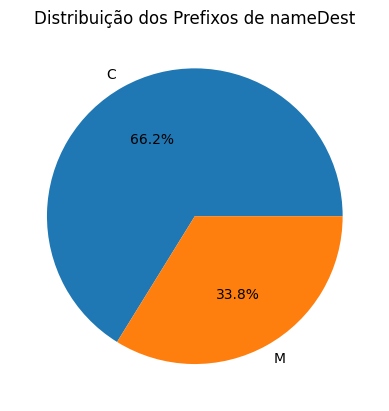

In [17]:
#grafico para mostrar a relação do M e do C
counts = dataset['prefixNameDest'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title('Distribuição dos Prefixos de nameDest')
plt.show()

<h4>Temos quase dois tercos cravados que seria 66.6666%, qual será o percentual dentro dos clientes fraudados?</h4>

In [18]:
dataset[dataset['isFraud'] == 1]['prefixNameDest'].value_counts()

C    8213
Name: prefixNameDest, dtype: int64

<h4>Aparentemente clientes com prefixo M não foram fraudados aqui já temos também então a quantidade de Fraudes total aparentemente um percentual baixíssimo, vamos ver este percentual?</h4>

In [19]:
dataset['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

<Figure size 600x600 with 0 Axes>

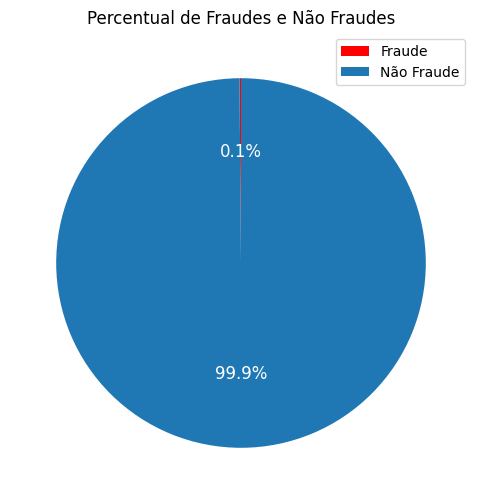

In [20]:
# Contagem das ocorrências de fraudes e não fraudes
fraud_count = dataset['isFraud'].value_counts()

# Criar uma lista com as contagens
count_list = [fraud_count[1], fraud_count[0]]
# Definir os rótulos para o gráfico
labels = ['Fraude', 'Não Fraude']

# Definir as cores das fatias
colors = ['#FF0000', '#1f77b4']  # Vermelho para fraude, azul para não fraude

# Plotar o gráfico de pizza
plt.figure(figsize=(6, 6))  # Definir tamanho da figura
plt.figure(figsize=(6, 6))  # Definir tamanho da figura
patches, _, text = plt.pie(count_list, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors,
                           textprops={'color': 'white', 'fontsize': 12})
# Adicionar título ao gráfico
plt.title('Percentual de Fraudes e Não Fraudes')
plt.legend()
plt.show()

<h4>É uma dificuldade muito grande de analisar uma base de dados quando os dados em evidência são uma parcela tão pequena do dataset, mas vamos em frente, será que temos outliers?</h4>

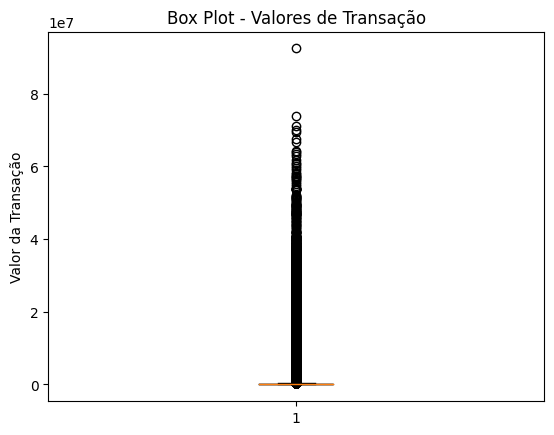

In [21]:
plt.boxplot(dataset['amount'])
plt.ylabel('Valor da Transação')
plt.title('Box Plot - Valores de Transação')
plt.show()

<h4>Este Gráfico está muito feio, pra ter uma idéia o normal seria um gráfico assim:</h4>

<p><img src ='img/boxplotExplica.png'></p>

<h4>Ou seja, não conseguimos nem ver o formato do gráfico</h4>

<h4>Vamos tentar uma visualização mais favorável com um scatter plot</h4>

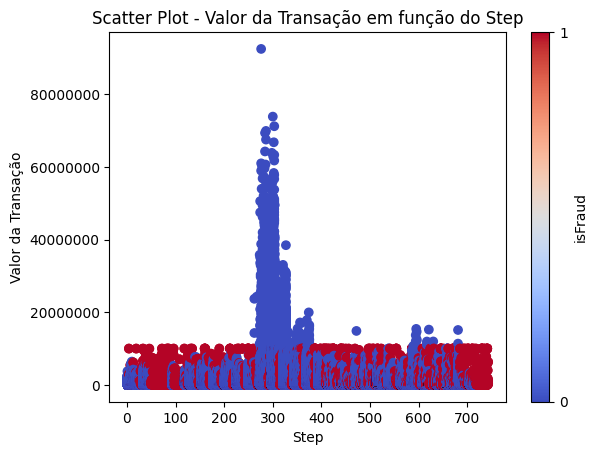

In [22]:

plt.scatter(dataset['step'], dataset['amount'], c=dataset['isFraud'], cmap='coolwarm')
plt.xlabel('Step')
plt.ylabel('Valor da Transação')
plt.title('Scatter Plot - Valor da Transação em função do Step')

plt.colorbar(label='isFraud', ticks=[0, 1])

# Ajustar o formato dos rótulos do eixo y
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in plt.gca().get_yticks()])

# Ajustar o formato dos rótulos do eixo x
plt.gca().set_xticklabels(['{:.0f}'.format(x) for x in plt.gca().get_xticks()])

plt.show()

<h4>Este gráfico ajudou a mostrar muitas coisas, primeiro, o formato inadequado do boxPlot não é por conta de um ou outro outlier, é por causa de uma sazonalidade assim podemos dizer, apenas para explicar o o step é um período, este período pode ser colocado em uma série temporal então este gráfico simula uma série temporal, aqui podemos ver que entre o período próximo a 250 até 350 parece ter uma grande atividade econômica, isso parece um momento sazonal<h4>

<h4>Mas ainda temos muitas informações importantes neste gráfico, temos um outlier, vamos lembrar do máximo do Describe numérico 92.445.516.64 todas as outras transações foram abaixo de 80 milhões</h4>
<h4>E o mais surpeendente, as transações mais altas não são fraudes, são normais, e as transações de fraude parece que existe um teto, existem valores mais baixos e valores na faixa inferior a 20 milhões muito inferior aos valores no pico da sazonalidade próximos a 80 milhões.</h4>

<h4>Neste caso vamos olhar mais de perto os numeros com fraude e sem fraude para tal desta vez famos splitar o dataset</h4>

In [23]:
# Filtrar o dataset original para obter o dataset sem as fraudes
dataset_no_fraude = dataset[dataset['isFraud'] == 0]

# Filtrar o dataset original para obter o dataset com as fraudes
dataset_fraude = dataset[dataset['isFraud'] == 1]

<h4>Vamos ver se as variáveis possuem Correlação<h4>

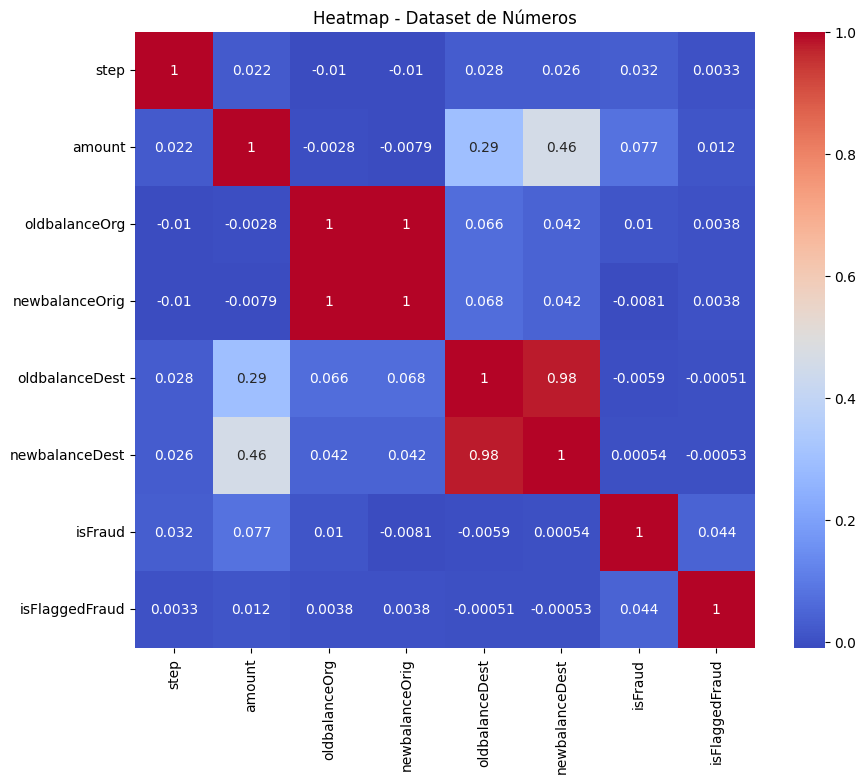

In [24]:
# Calcular a matriz de correlação
correlation_matrix = dataset.corr()

# Plotar o heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Heatmap - Dataset de Números")
plt.show()

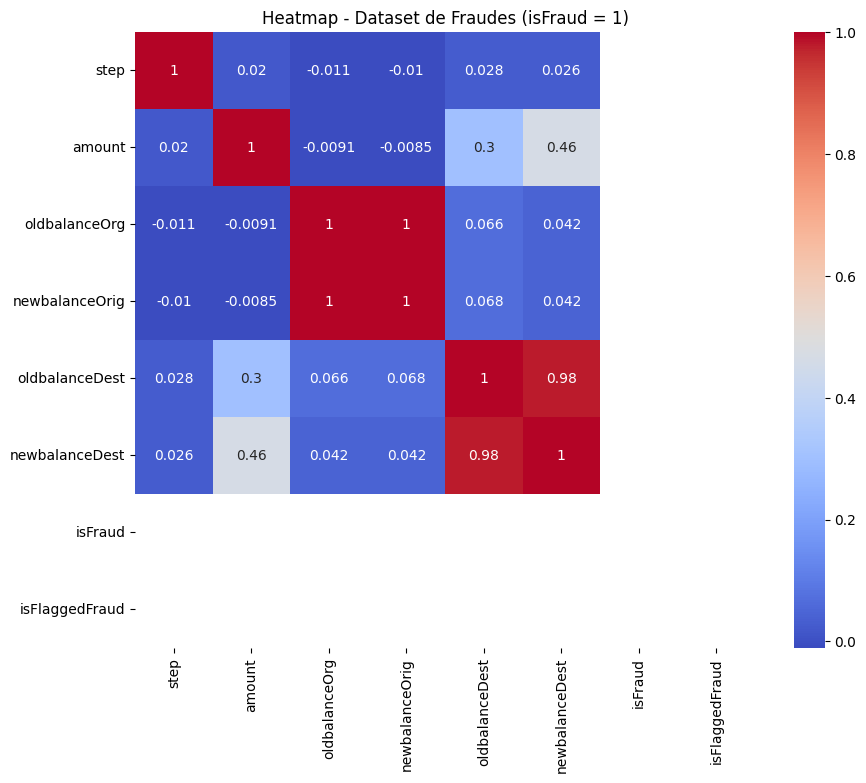

In [25]:
# Calcular a matriz de correlação para as transações sem fraude
correlation_matrix = dataset_no_fraude.corr()

# Plotar o heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Heatmap - Dataset de Fraudes (isFraud = 1)")
plt.show()

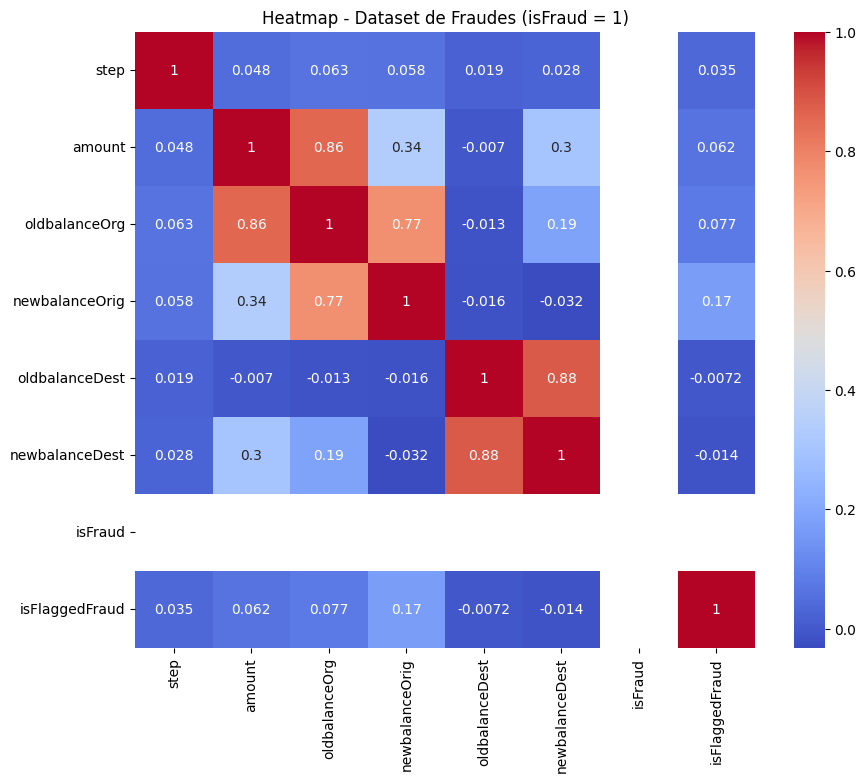

In [26]:
# Calcular a matriz de correlação para as transações de fraude
correlation_matrix = dataset_fraude.corr()

# Plotar o heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Heatmap - Dataset de Fraudes (isFraud = 1)")
plt.show()

<h4>Esta análise poderia ser excluída mas foi deixada para mostrar que parte do trabalho da análise exploratória é experimentar, este gráfico de correlação é excelente a matriz de correlação vai de -1 a 1 quanto mais perto de -1 indica uma correlação negativa, quanto mais perto de 1 indica uma correlação positiva, porém, pensando bem, é óbvio que este dataset possuem correlações já que o valor saí da conta de origem e entra na conta de destino poderia ser excluída mas exemplificou como o heatmap funciona, lembrando que qualquer coisa abaixo de -0.5 e acima de 0.5 indica uma correlação muito forte</h4>

<h4>Vamos ver agora a as quantidades das variáveis categóricas<h4>

In [27]:
dataset['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

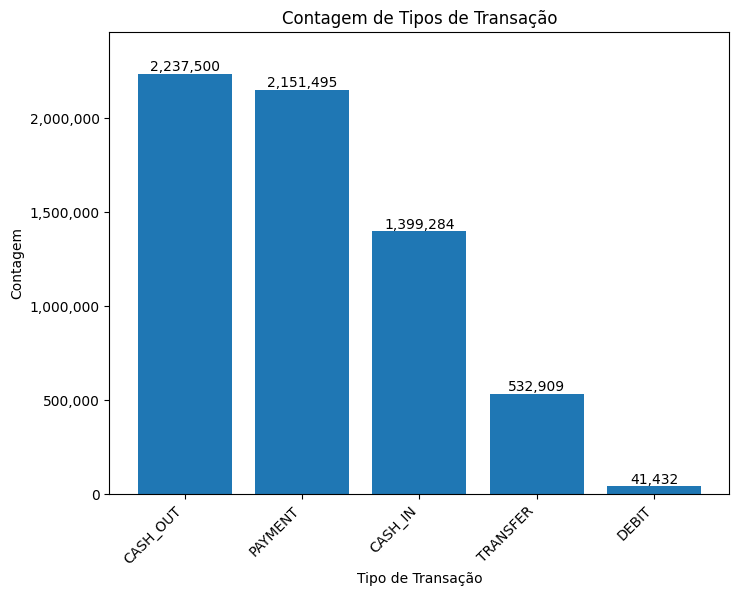

In [28]:
# Contagem das categorias 'type'
type_counts = dataset['type'].value_counts()

# Plotar gráfico de barras
plt.figure(figsize=(8, 6))  # Definir tamanho da figura
bars = plt.bar(type_counts.index, type_counts.values)  # Plotar barras
plt.xlabel('Tipo de Transação')  # Definir rótulo do eixo x
plt.ylabel('Contagem')  # Definir rótulo do eixo y
plt.title('Contagem de Tipos de Transação')  # Definir título do gráfico

# Personalizar eixo x para evitar rotação dos rótulos
plt.xticks(rotation=45, ha='right')

# Adicionar rótulos nas barras com separador de milhar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:,.0f}', ha='center', va='bottom')

# Ajustar escala do eixo y
plt.ylim(0, type_counts.max() * 1.1)

# Adicionar separador de milhar no eixo y
plt.gca().get_yaxis().set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Exibir o gráfico
plt.show()

<h4>Vamos ver a categórica para as fraudes</h4>

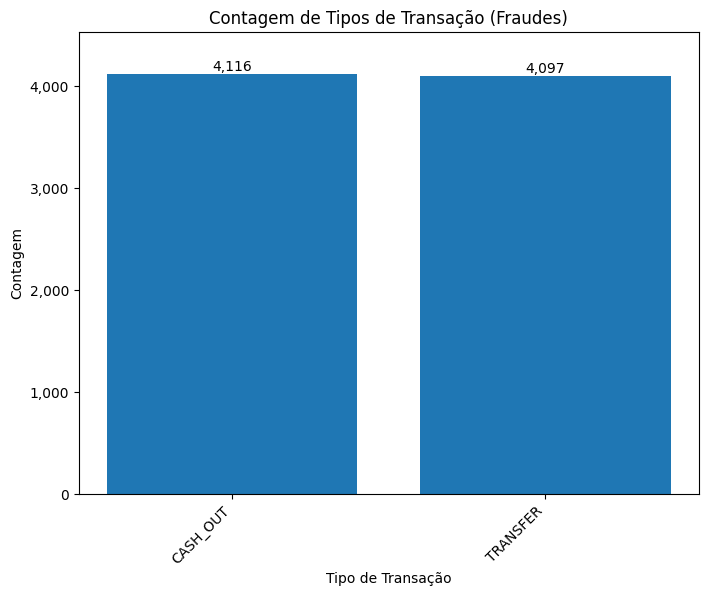

In [29]:
# Contagem das categorias 'type' no dataset filtrado
type_counts_frauds = dataset_fraude['type'].value_counts()

# Plotar gráfico de barras
plt.figure(figsize=(8, 6))  # Definir tamanho da figura
bars = plt.bar(type_counts_frauds.index, type_counts_frauds.values)  # Plotar barras
plt.xlabel('Tipo de Transação')  # Definir rótulo do eixo x
plt.ylabel('Contagem')  # Definir rótulo do eixo y
plt.title('Contagem de Tipos de Transação (Fraudes)')  # Definir título do gráfico

# Personalizar eixo x para evitar rotação dos rótulos
plt.xticks(rotation=45, ha='right')

# Adicionar rótulos nas barras com separador de milhar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:,.0f}', ha='center', va='bottom')

# Ajustar escala do eixo y
plt.ylim(0, type_counts_frauds.max() * 1.1)

# Adicionar separador de milhar no eixo y
plt.gca().get_yaxis().set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Exibir o gráfico
plt.show()

<h4>Aparentemente apenas duas categorias para as fraudes vamos fazer uma verificação dos valres das transações mais profunda agora.</h4>

In [30]:
dataset_fraude['amount'].describe()

count       8213.00
mean     1467967.30
std      2404252.95
min            0.00
25%       127091.33
50%       441423.44
75%      1517771.48
max     10000000.00
Name: amount, dtype: float64

In [31]:
dataset_no_fraude['amount'].describe()

count    6354407.00
mean      178197.04
std       596236.98
min            0.01
25%        13368.40
50%        74684.72
75%       208364.76
max     92445516.64
Name: amount, dtype: float64

<h4>Como bem evidenciado nos graficos anteriores, existe uma discrepancia muito grande de valores a maior transação fraudada foi de 10 milhões cravado, já a maior transação não fraudada é de mais de 90 milhões</h4> 
<h4>Vamos olhar mais de perto agora essas medidas</h4>

In [32]:
dataset_fraude['amount'].mean()

1467967.299140387

In [33]:
dataset_no_fraude['amount'].mean()

178197.04172740763

In [34]:
dataset_fraude['amount'].std()

2404252.9472401612

In [35]:
dataset_no_fraude['amount'].std()

596236.9813471739

<h4>É interessante ver a discrepância entre o 3 quartil e o valor máximo nos dois datasets, vamos ver em vezes o valor máximo é superior ao 3 quartil nos dois datasets<h4>

In [36]:
#vezes que o valor máximo é superior ao 3 quartil
dataset['amount'].max() / np.percentile(dataset['amount'], q=75)

442.9132916616116

In [37]:
dataset_fraude['amount'].max() / np.percentile(dataset_fraude['amount'], q=75)

6.588607133400609

<h4>Apesar do Desvio Padrão das fraudes ser maior o valor mais alto no caso das fraudes é cerca de 6x maior do que o valor de terceiro quartil já no caso do dataset normal o valor é cerca de 442 vezes superior</h4>

<h4>E apesar de transações muito altas no dataset regular a transação média do dataset de fraude é muito maior do que no dataset sem fraudes, isso mostra que os valores das transações fraudulentas são altos mas não tão altos a ponto de chamar atenção porque tem valores muito mais altos sem fraude, porém, são transações com valores mais similares entre si</h4>

<h4>Ainda não fizemos nenhuma análise referente às faixas da transação, esses valores médios das fraudes provocam curiosidade para saber sobre essas transações</h4>

In [38]:
dataset.groupby('amount_category')['amount'].count()


amount_category
Faixa 1    3525256
Faixa 2    2497080
Faixa 3     209658
Faixa 4     124976
Faixa 5       5650
Name: amount, dtype: int64

In [39]:
dataset_fraude.groupby('amount_category')['amount'].count()


amount_category
Faixa 1    1707
Faixa 2    2642
Faixa 3    1158
Faixa 4    2419
Faixa 5     287
Name: amount, dtype: int64

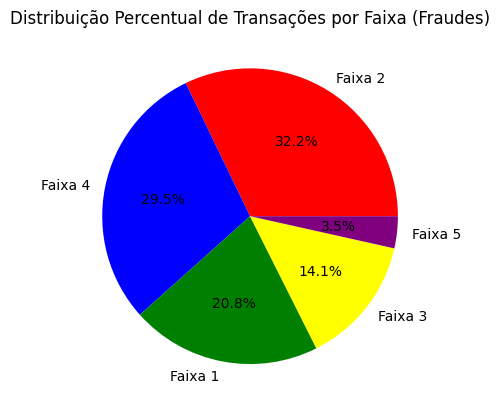

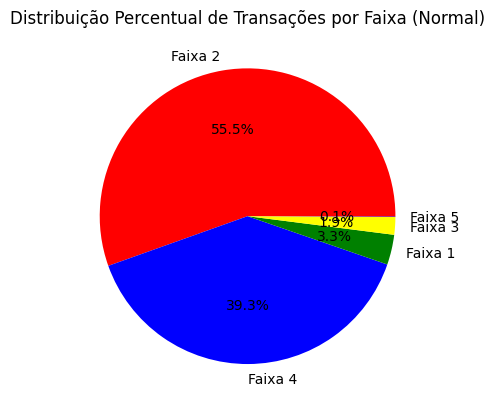

In [40]:
# Obter a contagem de transações por faixa de transações para o dataset de fraudes
contagem_por_faixa_fraude = dataset_fraude['amount_category'].value_counts()

# Obter a contagem de transações por faixa de transações para o dataset normal sem as fraudes
contagem_por_faixa_normal = dataset_no_fraude['amount_category'].value_counts()

# Configurar os rótulos das faixas de transações
labels = contagem_por_faixa_fraude.index

# Configurar os valores para o dataset de fraudes e para o dataset normal sem as fraudes
fraude_values = contagem_por_faixa_fraude.values
normal_values = contagem_por_faixa_normal.values

# Criar a figura e os eixos do primeiro gráfico de pizza para o dataset de fraudes
fig1, ax1 = plt.subplots()
ax1.pie(fraude_values, labels=labels, autopct='%1.1f%%', colors=['red', 'blue', 'green', 'yellow', 'purple'])
ax1.set_title('Distribuição Percentual de Transações por Faixa (Fraudes)')

# Criar a figura e os eixos do segundo gráfico de pizza para o dataset normal sem as fraudes
fig2, ax2 = plt.subplots()
ax2.pie(normal_values, labels=labels, autopct='%1.1f%%', colors=['red', 'blue', 'green', 'yellow', 'purple'])
ax2.set_title('Distribuição Percentual de Transações por Faixa (Normal)')

# Exibir os gráficos de pizza
plt.show()


<h4>Fica evidente que as trasações normais tem predominância na faixa 2 e 4 e percentuais baixíssimos nas outras faixas, já referente à fraude existe uma distribuição muito mais regular e equilibrada entre as faixas</h4>

<h4>Vamos verificar a soma das outras variaveis, os balanços das contas antigos e novos dentro da série temporal</h4>

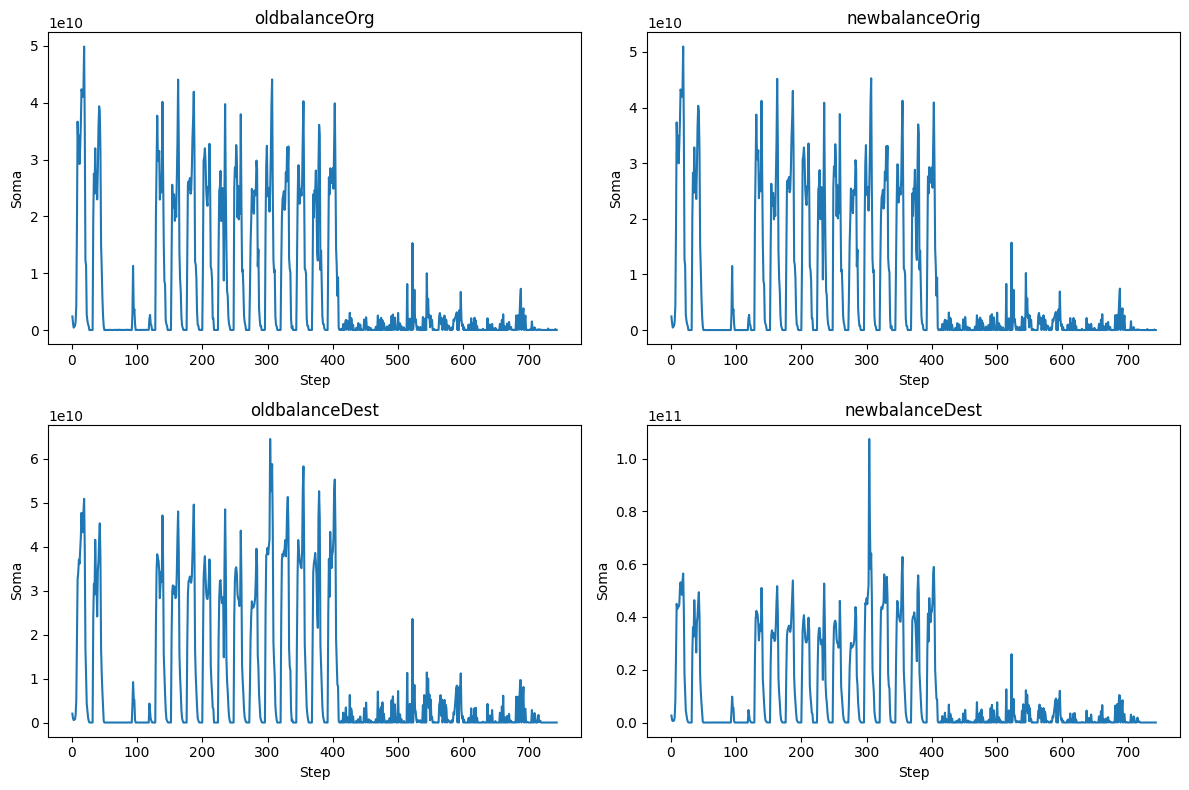

In [41]:

# Agrupar os dados por "step" e calcular a soma das séries
grouped_sum = dataset.groupby('step')['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest'].sum()

# Configurar o layout dos subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plotar gráfico para a série "oldbalanceOrg"
axs[0, 0].plot(grouped_sum.index, grouped_sum['oldbalanceOrg'])
axs[0, 0].set_xlabel('Step')
axs[0, 0].set_ylabel('Soma')
axs[0, 0].set_title('oldbalanceOrg')

# Plotar gráfico para a série "newbalanceOrig"
axs[0, 1].plot(grouped_sum.index, grouped_sum['newbalanceOrig'])
axs[0, 1].set_xlabel('Step')
axs[0, 1].set_ylabel('Soma')
axs[0, 1].set_title('newbalanceOrig')

# Plotar gráfico para a série "oldbalanceDest"
axs[1, 0].plot(grouped_sum.index, grouped_sum['oldbalanceDest'])
axs[1, 0].set_xlabel('Step')
axs[1, 0].set_ylabel('Soma')
axs[1, 0].set_title('oldbalanceDest')

# Plotar gráfico para a série "newbalanceDest"
axs[1, 1].plot(grouped_sum.index, grouped_sum['newbalanceDest'])
axs[1, 1].set_xlabel('Step')
axs[1, 1].set_ylabel('Soma')
axs[1, 1].set_title('newbalanceDest')

# Ajustar os espaçamentos entre os subplots
plt.tight_layout()

# Exibir o gráfico
plt.show()


<h4>Este grafico mostra como no geral os saldos das contas caíram durante a série temporal.<h4>

<h4>Agora vamos ver como ficaram as contas para o dataset onde houveram as fraudes</h4>

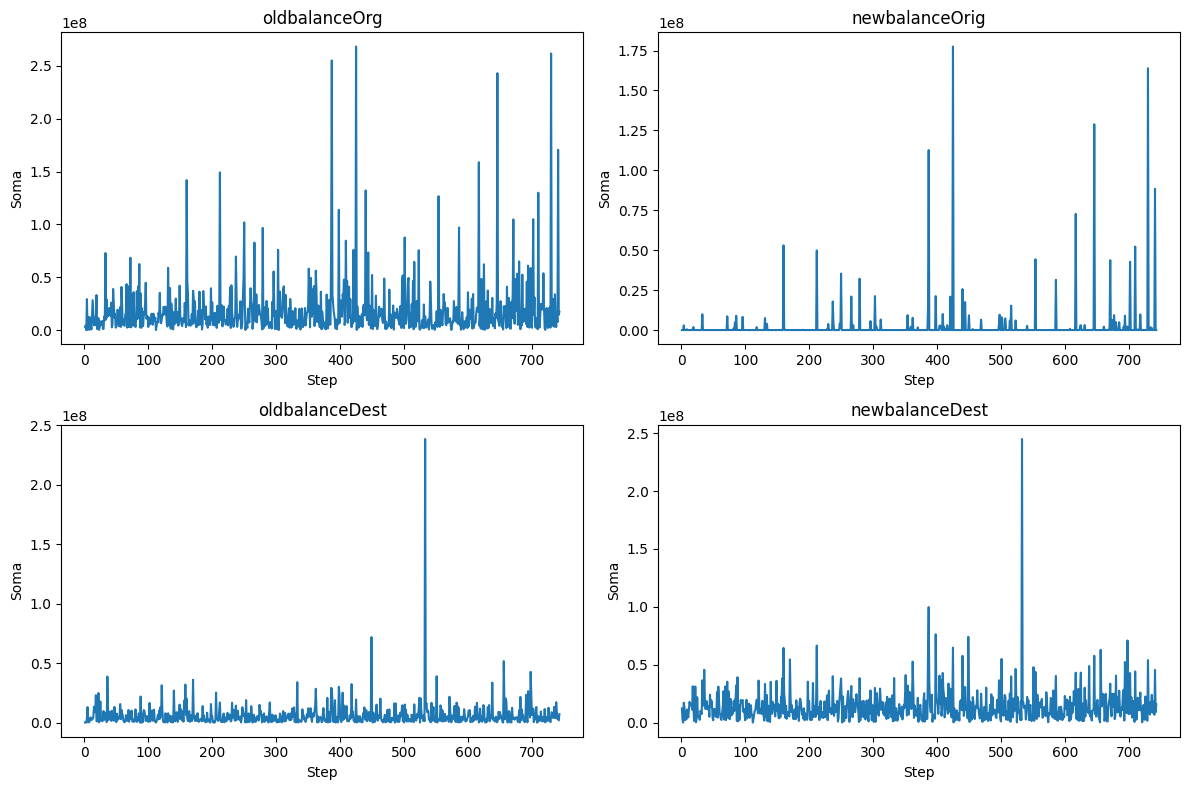

In [42]:

# Agrupar os dados por "step" e calcular a soma das séries agora dos fraudadas
grouped_sum = dataset_fraude.groupby('step')['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest'].sum()

# Configurar o layout dos subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plotar gráfico para a série "oldbalanceOrg"
axs[0, 0].plot(grouped_sum.index, grouped_sum['oldbalanceOrg'])
axs[0, 0].set_xlabel('Step')
axs[0, 0].set_ylabel('Soma')
axs[0, 0].set_title('oldbalanceOrg')

# Plotar gráfico para a série "newbalanceOrig"
axs[0, 1].plot(grouped_sum.index, grouped_sum['newbalanceOrig'])
axs[0, 1].set_xlabel('Step')
axs[0, 1].set_ylabel('Soma')
axs[0, 1].set_title('newbalanceOrig')

# Plotar gráfico para a série "oldbalanceDest"
axs[1, 0].plot(grouped_sum.index, grouped_sum['oldbalanceDest'])
axs[1, 0].set_xlabel('Step')
axs[1, 0].set_ylabel('Soma')
axs[1, 0].set_title('oldbalanceDest')

# Plotar gráfico para a série "newbalanceDest"
axs[1, 1].plot(grouped_sum.index, grouped_sum['newbalanceDest'])
axs[1, 1].set_xlabel('Step')
axs[1, 1].set_ylabel('Soma')
axs[1, 1].set_title('newbalanceDest')

# Ajustar os espaçamentos entre os subplots
plt.tight_layout()

# Exibir o gráfico
plt.show()

<h4>Aqui fica evidente que o balanço da origem estava cheio e no novo balanço diminuiu muito, e o balanço antigo do destino estava baixo e aumentou significativamente</h4>

<h4>Como falamos que aparentemente as fraudes possuem muita regularidade, vamos ver quantas frades tivemos dentro da série temporal, a quantidade de transações através de um histograma e comparar a forma do gráfico com o dataset normal</h4>

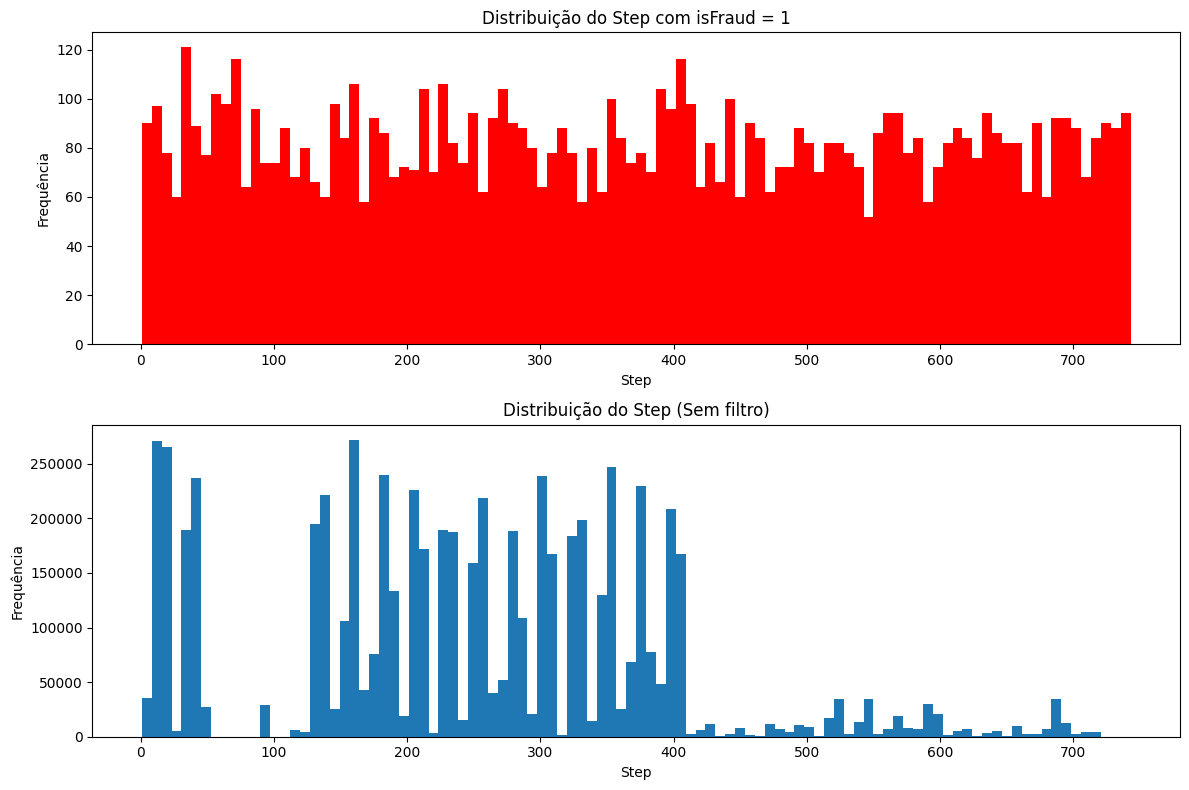

In [43]:
# Filtrar o dataset pelo isFraud = 1

# Configurar a figura e os eixos
fig, axs = plt.subplots(2, 1, figsize=(12, 8))

# Plotar o histograma do step com isFraud = 1
axs[0].hist(dataset_fraude['step'], bins=100, color='red')
axs[0].set_xlabel('Step')
axs[0].set_ylabel('Frequência')
axs[0].set_title('Distribuição do Step com isFraud = 1')

# Plotar o histograma do step sem filtro
axs[1].hist(dataset['step'], bins=100)
axs[1].set_xlabel('Step')
axs[1].set_ylabel('Frequência')
axs[1].set_title('Distribuição do Step (Sem filtro)')

# Ajustar os espaçamentos entre os subplots
plt.tight_layout()

# Exibir os histogramas
plt.show()

<h4>É uma distribuição muito uniforme no dataset de frades e uma queda na atividade economica após o periodo 400 no dataset normal muito grande, é como se um banco tiversse perdido 70% dos seus clientes mas as fraudes mantiveram sua regularidade</h4>

<h4>Vamos puxar um grafico de barras normal para ver as transações ao longo da série temporal e entender essa sazonalidade</h4>

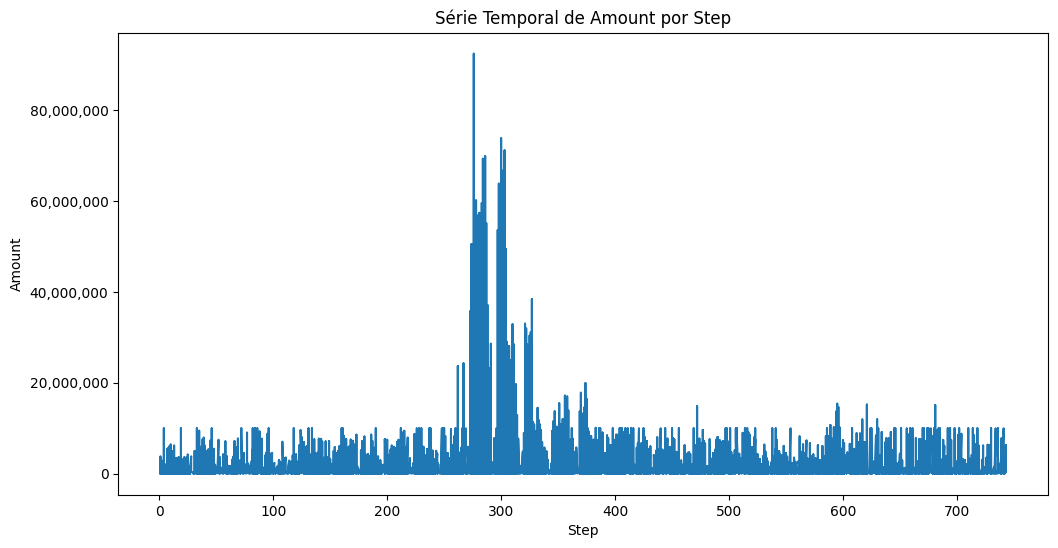

In [44]:
# Criar figura
fig, ax = plt.subplots(figsize=(12, 6))

# Plotar série temporal
ax.plot(dataset['step'], dataset['amount'])

# Configurar os eixos
ax.set_xlabel('Step')
ax.set_ylabel('Amount')
ax.set_title('Série Temporal de Amount por Step') 

ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{x:,.0f}'))

ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{x:,.0f}'))

# Exibir o gráfico
plt.show()

<h4>Assim como no scatter plot realmente parece haver um padrão das trasações e um pico de sazonalidade no meio do gráfico</h4>

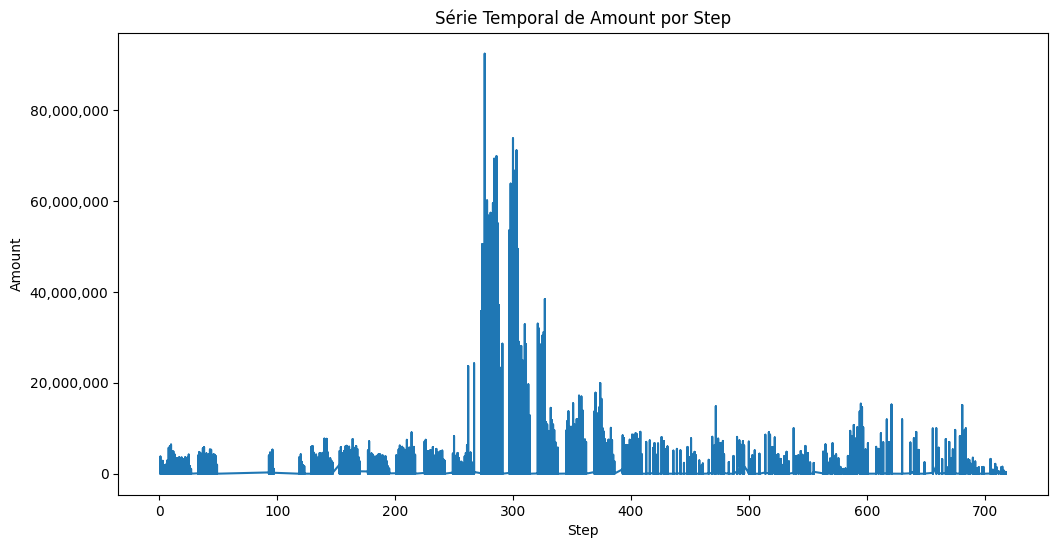

In [45]:
# Criar figura
fig, ax = plt.subplots(figsize=(12, 6))

# Plotar série temporal
ax.plot(dataset_no_fraude['step'], dataset_no_fraude['amount'])

# Configurar os eixos
ax.set_xlabel('Step')
ax.set_ylabel('Amount')
ax.set_title('Série Temporal de Amount por Step') 

ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{x:,.0f}'))

ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{x:,.0f}'))

# Exibir o gráfico
plt.show()

<h4>Olhando o grafico sem as fraudes, podemos perceber que não há aquela regularidade nas transações, o que dá regularidade na imagem são as fraudes</h4>

<h4>Vejamos como ficaria um gráfico de transações acumulado do dataset sem fraudes para ver a questão da regularidade</h4>

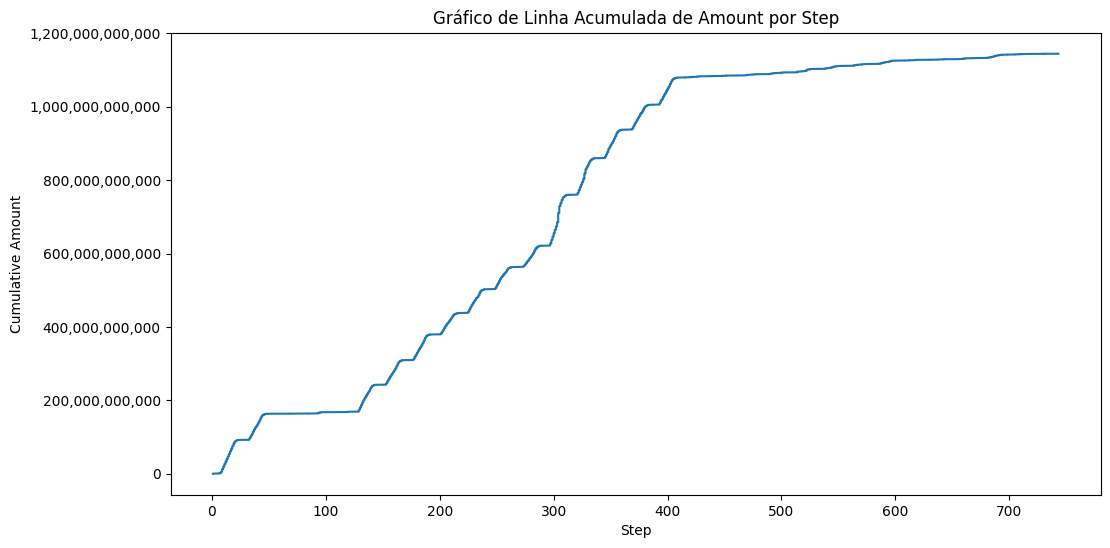

In [46]:
# Criar figura
fig, ax = plt.subplots(figsize=(12, 6))

# Calcular a soma acumulada da coluna "amount"
cumulative_amount = dataset['amount'].cumsum()

# Plotar a linha acumulada
ax.plot(dataset['step'], cumulative_amount)

# Configurar os eixos
ax.set_xlabel('Step')
ax.set_ylabel('Cumulative Amount')
ax.set_title('Gráfico de Linha Acumulada de Amount por Step')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{x:,.0f}'))
# Exibir o gráfico
plt.show()

<h4>Vejamos a dispersão e o acumulado do dataset de fraudes</h4>

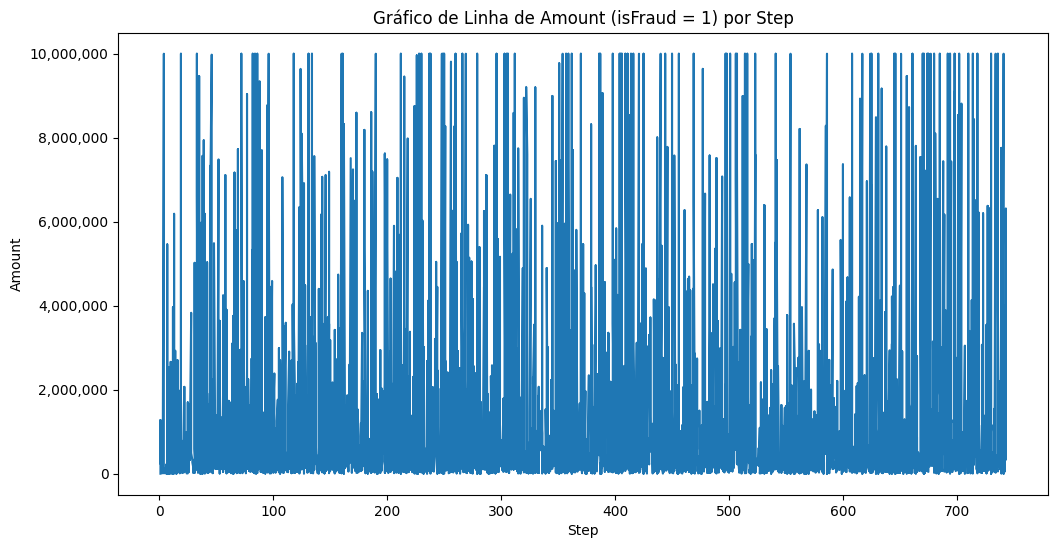

In [47]:
# Criar figura
fig, ax = plt.subplots(figsize=(12, 6))

# Plotar a linha não cumulativa para o dataset de fraudes
ax.plot(dataset_fraude['step'], dataset_fraude['amount'])

# Configurar os eixos
ax.set_xlabel('Step')
ax.set_ylabel('Amount')
ax.set_title('Gráfico de Linha de Amount (isFraud = 1) por Step')

ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{x:,.0f}'))

# Exibir o gráfico
plt.show()

<h4>É um gráfico desagradável de se olhar mas que diz muito sobre a regularidade das transaçoes e a distribuição quase uniforme</h4>

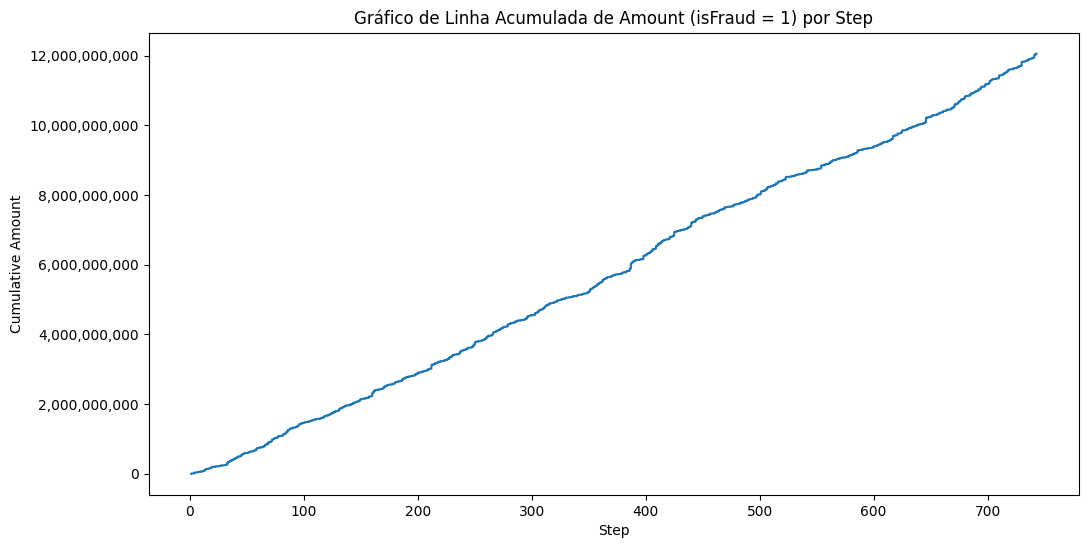

In [48]:
# Criar figura
fig, ax = plt.subplots(figsize=(12, 6))

# Calcular a soma acumulada da coluna "amount" para o dataset de fraudes
cumulative_amount_fraud = dataset_fraude['amount'].cumsum()

# Plotar a linha acumulada para o dataset de fraudes
ax.plot(dataset_fraude['step'], cumulative_amount_fraud)

# Configurar os eixos
ax.set_xlabel('Step')
ax.set_ylabel('Cumulative Amount')
ax.set_title('Gráfico de Linha Acumulada de Amount (isFraud = 1) por Step')

ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{x:,.0f}'))

# Exibir o gráfico
plt.show()

<h4>Neste acumulado a padronização dos valores fraudados ficam mais evidentes ainda</h4>

<h4>Já vimos que este dataset é complicado, tem um percentual muito baixo de fraudes poucas variáveis categóricas, as fraudes ocorreram em todos os momentos da série temporal com valores bem distribuídos que não chamam a atenção inclusive bem abaixo dos outliers e dos momentos sazonais, vamos tentar criar uma forma mais fácil de prever essas fraudes com algumas técnicas de machine lerning</h4>

<h4>Agora que não iremos adicionar mais nenhuma coluna no dataset, deixamos para o final fazer o pré-processamento de dados, uma vez que os datasets para machine learning precisam estar em variáveis numéricas</h4>

In [49]:
# Criar cópia do dataset original
dataset_ml = dataset.copy()

# Criar instância do LabelEncoder
label_encoder = LabelEncoder()

# Codificar as variáveis categóricas e labels
dataset_ml['type_encoded'] = label_encoder.fit_transform(dataset_ml['type'])
dataset_ml['nameOrig_encoded'] = label_encoder.fit_transform(dataset_ml['nameOrig'])
dataset_ml['nameDest_encoded'] = label_encoder.fit_transform(dataset_ml['nameDest'])
dataset_ml['prefixNameOrig_encoded'] = label_encoder.fit_transform(dataset_ml['prefixNameOrig'])
dataset_ml['prefixNameDest_encoded'] = label_encoder.fit_transform(dataset_ml['prefixNameDest'])
dataset_ml['amount_category_encoded'] = label_encoder.fit_transform(dataset_ml['amount_category'])

# Remover colunas não utilizadas
columns_to_drop = ['type', 'nameOrig', 'nameDest', 'prefixNameOrig', 'prefixNameDest', 'amount_category']
dataset_ml = dataset_ml.drop(columns=columns_to_drop)


<h4>Vamos verificar o resultado de nosso dataset para Machine Learning</h4>

In [50]:
dataset_ml.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_encoded,nameOrig_encoded,nameDest_encoded,prefixNameOrig_encoded,prefixNameDest_encoded,amount_category_encoded
count,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00
mean,243.40,179861.90,833883.10,855113.67,1100701.67,1224996.40,0.00,0.00,1.71,3176678.11,746427.04,0.00,0.34,0.52
std,142.33,603858.23,2888242.67,2924048.50,3399180.11,3674128.94,0.04,0.00,1.35,1834064.17,750245.52,0.00,0.47,0.67
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,156.00,13389.57,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1588331.75,216895.00,0.00,0.00,0.00
50%,239.00,74871.94,14208.00,0.00,132705.66,214661.44,0.00,0.00,1.00,3176672.50,432289.00,0.00,0.00,0.00
75%,335.00,208721.48,107315.18,144258.41,943036.71,1111909.25,0.00,0.00,3.00,4765048.25,1132509.25,0.00,1.00,1.00
max,743.00,92445516.64,59585040.37,49585040.37,356015889.35,356179278.92,1.00,1.00,4.00,6353306.00,2722361.00,0.00,1.00,4.00


In [51]:
dataset_ml.dtypes

step                         int64
amount                     float64
oldbalanceOrg              float64
newbalanceOrig             float64
oldbalanceDest             float64
newbalanceDest             float64
isFraud                      int64
isFlaggedFraud               int64
type_encoded                 int64
nameOrig_encoded             int64
nameDest_encoded             int64
prefixNameOrig_encoded       int64
prefixNameDest_encoded       int64
amount_category_encoded      int64
dtype: object

In [52]:
# Separar os conjuntos de treino e teste
X = dataset_ml.drop('isFraud', axis=1)
y = dataset_ml['isFraud']
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=42)

In [53]:
df_resultados = pd.DataFrame(columns=['Algoritmo', 'Acuracia_Geral', 'Acuracia_Fraude', 'Acuracia_No_Fraude', 'Tempo_Execucao'])

In [54]:
dtInicio = datetime.datetime.now()
# Criar uma instância do classificador de árvore de decisão
arvoreDeDecisao = DecisionTreeClassifier()

# Treinar o classificador utilizando os dados de treinamento
arvoreDeDecisao.fit(X_treino, y_treino)

# Fazer previsões utilizando os dados de teste
previsoes = arvoreDeDecisao.predict(X_teste)

# Calcular a acurácia do modelo
acuracia_arvore = accuracy_score(y_teste, previsoes)
acuracia_arvore_no_fraude = accuracy_score(y_teste[y_teste == 0], previsoes[y_teste == 0])
acuracia_arvore_fraude = accuracy_score(y_teste[y_teste == 1], previsoes[y_teste == 1])
print("Acurácia do modelo de Arvore de decisão foi:", acuracia_arvore)
print("Acurácia do modelo de Arvore de decisão para operações fraudulentas foi:", acuracia_arvore_fraude)
print("Acurácia do modelo de Arvore de decisão para operações não fraudulentas foi:", acuracia_arvore_no_fraude)
dtFin = datetime.datetime.now()
tempoExecucao = dtFin - dtInicio 

df_resultados = df_resultados.append({
    'Algoritmo': 'Árvore de Decisão',
    'Acuracia_Geral': acuracia_arvore,
    'Acuracia_Fraude': acuracia_arvore_fraude,
    'Acuracia_No_Fraude': acuracia_arvore_no_fraude,
    'Tempo_Execucao': tempoExecucao
}, ignore_index=True)

Acurácia do modelo de Arvore de decisão foi: 0.999676234004231
Acurácia do modelo de Arvore de decisão para operações fraudulentas foi: 0.864476386036961
Acurácia do modelo de Arvore de decisão para operações não fraudulentas foi: 0.9998489260372303


In [55]:
# Pré-processamento dos dados
scaler = StandardScaler()
X_treino_scaled = scaler.fit_transform(X_treino)
X_teste_scaled = scaler.transform(X_teste)

In [56]:
dtInicio = datetime.datetime.now()
# Criação do modelo de Regressão Logística
logreg = LogisticRegression()

# Treinamento do modelo
logreg.fit(X_treino, y_treino)

# Previsões no conjunto de teste
y_pred_logreg = logreg.predict(X_teste)

# Cálculo da acurácia geral
acuracia_Logistica_geral = accuracy_score(y_teste, y_pred_logreg)

# Filtrar os dados para calcular a acurácia para a classe de fraude
acuracia_Logistica_Fraude = accuracy_score(y_teste[y_teste == 1], y_pred_logreg[y_teste == 1])

# Filtrar os dados para calcular a acurácia para a classe sem fraude
acuracia_Logistica_No_Fraude = accuracy_score(y_teste[y_teste == 0], y_pred_logreg[y_teste == 0]) 

print("Acurácia do modelo de Regressão Logística geral foi:", acuracia_Logistica_geral)
print("Acurácia do modelo de Regressão Logística em operações fraudulentas foi:", acuracia_Logistica_Fraude)
print("Acurácia do modelo de Regressão Logística para operações não fraudulentas foi:", acuracia_Logistica_No_Fraude)
dtFin = datetime.datetime.now()
tempoExecucao = dtFin - dtInicio 

df_resultados = df_resultados.append({
    'Algoritmo': 'Regressão Logística',
    'Acuracia_Geral': acuracia_Logistica_geral,
    'Acuracia_Fraude': acuracia_Logistica_Fraude,
    'Acuracia_No_Fraude': acuracia_Logistica_No_Fraude,
    'Tempo_Execucao': tempoExecucao
}, ignore_index=True)


Acurácia do modelo de Regressão Logística geral foi: 0.9991329567589033
Acurácia do modelo de Regressão Logística em operações fraudulentas foi: 0.43983572895277206
Acurácia do modelo de Regressão Logística para operações não fraudulentas foi: 0.9998473523501181


In [57]:
dtInicio = datetime.datetime.now()
# Criar uma instância do modelo MLPClassifier
mlp = MLPClassifier()

# Treinar o modelo usando os dados de treino
mlp.fit(X_treino, y_treino)

# Fazer previsões para os dados de teste
y_pred = mlp.predict(X_teste)

# Calcular a acurácia geral
acuracia_MLP_geral = accuracy_score(y_teste, y_pred)

# Filtrar os dados para calcular a acurácia para a classe de fraude
acuracia_MLP_Fraude = accuracy_score(y_teste[y_teste == 1], y_pred[y_teste == 1])

# Filtrar os dados para calcular a acurácia para a classe sem fraude
acuracia_MLP_No_Fraude = accuracy_score(y_teste[y_teste == 0], y_pred[y_teste == 0]) 

print("Acurácia do modelo de Rede Neural MLP geral foi:", acuracia_MLP_geral)
print("Acurácia do modelo de Rede Neural MLP em operações fraudulentas foi:", acuracia_MLP_Fraude)
print("Acurácia do modelo de Rede Neural MLP para operações não fraudulentas foi:", acuracia_MLP_No_Fraude)

dtFin = datetime.datetime.now()
tempoExecucao = dtFin - dtInicio 

df_resultados = df_resultados.append({
    'Algoritmo': 'Rede Neural MLP Class',
    'Acuracia_Geral': acuracia_MLP_geral,
    'Acuracia_Fraude': acuracia_MLP_Fraude,
    'Acuracia_No_Fraude': acuracia_MLP_No_Fraude,
    'Tempo_Execucao': tempoExecucao
}, ignore_index=True)


Acurácia do modelo de Rede Neural MLP geral foi: 0.9987693748801594
Acurácia do modelo de Rede Neural MLP em operações fraudulentas foi: 0.03696098562628337
Acurácia do modelo de Rede Neural MLP para operações não fraudulentas foi: 0.9999979017505171


<h4>Esta acurácia da rede neural MLP ficou muito baixa, quando isso acontece o ideal é fazer uma experimentação mudando alguns parametros, neste caso mudaremos todos e adicionaremos profundidade com 3 camadas de neurônios.</h4>

In [58]:
dtInicio = datetime.datetime.now()
# Criar uma instância do modelo MLPClassifier
mlpNdef = MLPClassifier(hidden_layer_sizes=(64, 64, 64), random_state=42, activation='identity', solver='lbfgs')

# Treinar o modelo usando os dados de treino
mlpNdef.fit(X_treino, y_treino)

# Fazer previsões para os dados de teste
y_pred = mlpNdef.predict(X_teste)

# Calcular a acurácia geral
acuracia_MLPNdef_geral = accuracy_score(y_teste, y_pred)

# Filtrar os dados para calcular a acurácia para a classe de fraude
acuracia_MLPNdef_Fraude = accuracy_score(y_teste[y_teste == 1], y_pred[y_teste == 1])

# Filtrar os dados para calcular a acurácia para a classe sem fraude
acuracia_MLPNdef_No_Fraude = accuracy_score(y_teste[y_teste == 0], y_pred[y_teste == 0]) 

print("Acurácia do modelo de Rede Neural MLP geral foi:", acuracia_MLPNdef_geral)
print("Acurácia do modelo de Rede Neural MLP em operações fraudulentas foi:", acuracia_MLPNdef_Fraude)
print("Acurácia do modelo de Rede Neural MLP para operações não fraudulentas foi:", acuracia_MLPNdef_No_Fraude)

dtFin = datetime.datetime.now()
tempoExecucao = dtFin - dtInicio 

df_resultados = df_resultados.append({
    'Algoritmo': 'Rede Neural MLP Class Alterado',
    'Acuracia_Geral': acuracia_MLPNdef_geral,
    'Acuracia_Fraude': acuracia_MLPNdef_Fraude,
    'Acuracia_No_Fraude': acuracia_MLPNdef_No_Fraude,
    'Tempo_Execucao': tempoExecucao
}, ignore_index=True)

Acurácia do modelo de Rede Neural MLP geral foi: 0.951825924959634
Acurácia do modelo de Rede Neural MLP em operações fraudulentas foi: 0.002053388090349076
Acurácia do modelo de Rede Neural MLP para operações não fraudulentas foi: 0.9530390783229321


<h4>Surpreendentemente a acurácia piorou, vamos tentar fazer uma rede com mais camadas utilizar os padrões normais do algoritmo e só adicionar profundidade mais para o final</h4>

In [59]:
dtInicio = datetime.datetime.now()
# Criar uma instância do modelo SVC
svc = SVC()

# Treinar o modelo usando os dados de treino
svc.fit(X_treino, y_treino)

# Fazer previsões para os dados de teste
y_pred = svc.predict(X_teste)

# Calcular a acurácia geral
acuracia_SVC_geral = accuracy_score(y_teste, y_pred)

# Filtrar os dados para calcular a acurácia para a classe de fraude
acuracia_SVC_Fraude = accuracy_score(y_teste[y_teste == 1], y_pred[y_teste == 1])

# Filtrar os dados para calcular a acurácia para a classe sem fraude
acuracia_SVC_No_Fraude = accuracy_score(y_teste[y_teste == 0], y_pred[y_teste == 0])

print("Acurácia do modelo de Algoritmo de Classificação SVC geral foi:", acuracia_SVC_geral)
print("Acurácia do modelo de Algoritmo de Classificação SVC em operações fraudulentas foi:", acuracia_SVC_Fraude)
print("Acurácia do modelo de Algoritmo de Classificação SVC para operações não fraudulentas foi:", acuracia_SVC_No_Fraude)

dtFin = datetime.datetime.now()
tempoExecucao = dtFin - dtInicio 

df_resultados = df_resultados.append({
    'Algoritmo': 'Support Vector Classifier',
    'Acuracia_Geral': acuracia_SVC_geral,
    'Acuracia_Fraude': acuracia_SVC_Fraude,
    'Acuracia_No_Fraude': acuracia_SVC_No_Fraude,
    'Tempo_Execucao': tempoExecucao
}, ignore_index=True)

Acurácia do modelo de Algoritmo de Classificação SVC geral foi: 0.9991439585160411
Acurácia do modelo de Algoritmo de Classificação SVC em operações fraudulentas foi: 0.33305954825462014
Acurácia do modelo de Algoritmo de Classificação SVC para operações não fraudulentas foi: 0.9999947543762927


In [60]:
dtInicio = datetime.datetime.now()
# Criar uma instância do modelo GaussianNB
nb = GaussianNB()

# Treinar o modelo usando os dados de treino
nb.fit(X_treino, y_treino)

# Fazer previsões para os dados de teste
y_pred = nb.predict(X_teste)

# Calcular a acurácia geral
acuracia_NB_geral = accuracy_score(y_teste, y_pred)

# Filtrar os dados para calcular a acurácia para a classe de fraude
acuracia_NB_Fraude = accuracy_score(y_teste[y_teste == 1], y_pred[y_teste == 1])

# Filtrar os dados para calcular a acurácia para a classe sem fraude
acuracia_NB_No_Fraude = accuracy_score(y_teste[y_teste == 0], y_pred[y_teste == 0]) 

print("Acurácia do modelo de Algoritmo Naive Bayes geral foi:", acuracia_NB_geral)
print("Acurácia do modelo de Algoritmo Naive Bayes em operações fraudulentas foi:", acuracia_NB_Fraude)
print("Acurácia do modelo de Algoritmo Naive Bayes para operações não fraudulentas foi:", acuracia_NB_No_Fraude)

dtFin = datetime.datetime.now()
tempoExecucao = dtFin - dtInicio 

df_resultados = df_resultados.append({
    'Algoritmo': 'Naive Bayes',
    'Acuracia_Geral': acuracia_NB_geral,
    'Acuracia_Fraude': acuracia_NB_Fraude,
    'Acuracia_No_Fraude': acuracia_NB_No_Fraude,
    'Tempo_Execucao': tempoExecucao
}, ignore_index=True)

Acurácia do modelo de Algoritmo Naive Bayes geral foi: 0.991427011723682
Acurácia do modelo de Algoritmo Naive Bayes em operações fraudulentas foi: 0.17330595482546202
Acurácia do modelo de Algoritmo Naive Bayes para operações não fraudulentas foi: 0.9924720054176802


In [61]:
dtInicio = datetime.datetime.now()
# Criar uma instância do modelo KNN
knn = KNeighborsClassifier()

# Treinar o modelo usando os dados de treino
knn.fit(X_treino, y_treino)

# Fazer previsões para os dados de teste
y_pred = knn.predict(X_teste)

# Calcular a acurácia geral
acuracia_KNN_geral = accuracy_score(y_teste, y_pred)

# Filtrar os dados para calcular a acurácia para a classe de fraude
acuracia_KNN_Fraude = accuracy_score(y_teste[y_teste == 1], y_pred[y_teste == 1])

# Filtrar os dados para calcular a acurácia para a classe sem fraude
acuracia_KNN_No_Fraude = accuracy_score(y_teste[y_teste == 0], y_pred[y_teste == 0])

print("Acurácia do modelo de Algoritmo KNN geral foi:", acuracia_KNN_geral)
print("Acurácia do modelo de Algoritmo KNN em operações fraudulentas foi:", acuracia_KNN_Fraude)
print("Acurácia do modelo de Algoritmo KNN para operações não fraudulentas foi:", acuracia_KNN_No_Fraude)

dtFin = datetime.datetime.now()
tempoExecucao = dtFin - dtInicio 

df_resultados = df_resultados.append({
    'Algoritmo': 'K Nearest Neighbors',
    'Acuracia_Geral': acuracia_KNN_geral,
    'Acuracia_Fraude': acuracia_KNN_Fraude,
    'Acuracia_No_Fraude': acuracia_KNN_No_Fraude,
    'Tempo_Execucao': tempoExecucao
}, ignore_index=True) 

Acurácia do modelo de Algoritmo KNN geral foi: 0.9993037459411375
Acurácia do modelo de Algoritmo KNN em operações fraudulentas foi: 0.526488706365503
Acurácia do modelo de Algoritmo KNN para operações não fraudulentas foi: 0.9999076770227519


In [62]:
df_resultados.head(10)

,Algoritmo,Acuracia_Geral,Acuracia_Fraude,Acuracia_No_Fraude,Tempo_Execucao
0,Árvore de Decisão,1.00,0.86,1.00,0 days 00:01:21.276526
1,Regressão Logística,1.00,0.44,1.00,0 days 00:00:38.399384
2,Rede Neural MLP Class,1.00,0.04,1.00,0 days 00:20:33.739344
3,Rede Neural MLP Class Alterado,0.95,0.00,0.95,0 days 00:10:44.489893
4,Support Vector Classifier,1.00,0.33,1.00,0 days 01:15:57.424972
5,Naive Bayes,0.99,0.17,0.99,0 days 00:00:02.423080
6,K Nearest Neighbors,1.00,0.53,1.00,0 days 00:04:37.504406


In [63]:
dtInicio = datetime.datetime.now()
# Criar uma instância do modelo MLPClassifier
mlpDeep = MLPClassifier(hidden_layer_sizes=(100, 100, 100, 100), random_state=42)
#Tentativa de criar uma camada mais profunda de 100 neuronios em 4 camadas

# Treinar o modelo usando os dados de treino
mlpDeep.fit(X_treino, y_treino)

# Fazer previsões para os dados de teste
y_pred = mlpDeep.predict(X_teste)

# Calcular a acurácia geral
acuracia_mlpDeep_geral = accuracy_score(y_teste, y_pred)

# Filtrar os dados para calcular a acurácia para a classe de fraude
acuracia_mlpDeep_Fraude = accuracy_score(y_teste[y_teste == 1], y_pred[y_teste == 1])

# Filtrar os dados para calcular a acurácia para a classe sem fraude
acuracia_mlpDeep_No_Fraude = accuracy_score(y_teste[y_teste == 0], y_pred[y_teste == 0]) 

print("Acurácia do modelo de Rede Neural MLP geral foi:", acuracia_mlpDeep_geral)
print("Acurácia do modelo de Rede Neural MLP em operações fraudulentas foi:", acuracia_mlpDeep_Fraude)
print("Acurácia do modelo de Rede Neural MLP para operações não fraudulentas foi:", acuracia_mlpDeep_No_Fraude)

dtFin = datetime.datetime.now()
tempoExecucao = dtFin - dtInicio 

df_resultados = df_resultados.append({
    'Algoritmo': 'Rede Neural MLP Class 4 layers',
    'Acuracia_Geral': acuracia_mlpDeep_geral,
    'Acuracia_Fraude': acuracia_mlpDeep_Fraude,
    'Acuracia_No_Fraude': acuracia_mlpDeep_No_Fraude,
    'Tempo_Execucao': tempoExecucao
}, ignore_index=True)

: 

: 